In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling: 평균, 표준편차 기준
from sklearn.preprocessing import StandardScaler

# linkage: 계층형 군집분석, dendrogram: 계층구조 나무, cluster: linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# KMeans 군집분석, DBSCAN 군집분석
from sklearn.cluster import KMeans, DBSCAN

# 데이터 분할: train, set
from sklearn.model_selection import train_test_split
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
import sklearn
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 1. 데이터 구성하기

In [2]:
df_raw = pd.read_csv("C:/Users/squar/Desktop/data/직무능력평가.CSV", engine = "python")
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


# 2. 데이터 전처리 - scaling

In [3]:
# 데이터 표준화
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [4]:
# >>> 목표변수의 column 위치 꼭 확인하기!!! <<<

# 목표 변수
df_raw_y = df_raw_scaled[:,0]
# 설명 변수
df_raw_x = df_raw_scaled[:, 1::]

# 3. Dendrogram

In [5]:
# 연결: ward, 거리 계산: Euclidean
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
# 연결: average, 거리 계산: Euclidean
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")
# 연결: average, 거리 계산: minkowski
Z_Minkowski = linkage(df_raw_x, method = "average", metric = "minkowski")

In [6]:
# 군집 생성 결과 확인
Z_ward

array([[14.        , 26.        ,  0.52156235,  2.        ],
       [ 3.        , 27.        ,  0.65700712,  2.        ],
       [ 9.        , 22.        ,  0.84734214,  2.        ],
       [16.        , 28.        ,  1.13863458,  2.        ],
       [ 6.        ,  7.        ,  1.17063718,  2.        ],
       [ 1.        , 21.        ,  1.22298201,  2.        ],
       [11.        , 32.        ,  1.31728974,  3.        ],
       [ 2.        ,  4.        ,  1.33423955,  2.        ],
       [24.        , 36.        ,  1.47235046,  4.        ],
       [30.        , 37.        ,  1.65014418,  4.        ],
       [18.        , 35.        ,  1.78970024,  3.        ],
       [29.        , 34.        ,  1.8539993 ,  3.        ],
       [10.        , 12.        ,  1.88477465,  2.        ],
       [31.        , 38.        ,  1.94570646,  6.        ],
       [25.        , 33.        ,  2.11914806,  3.        ],
       [ 5.        , 42.        ,  2.16582648,  3.        ],
       [17.        , 19.

Text(0, 0.5, 'sample index')

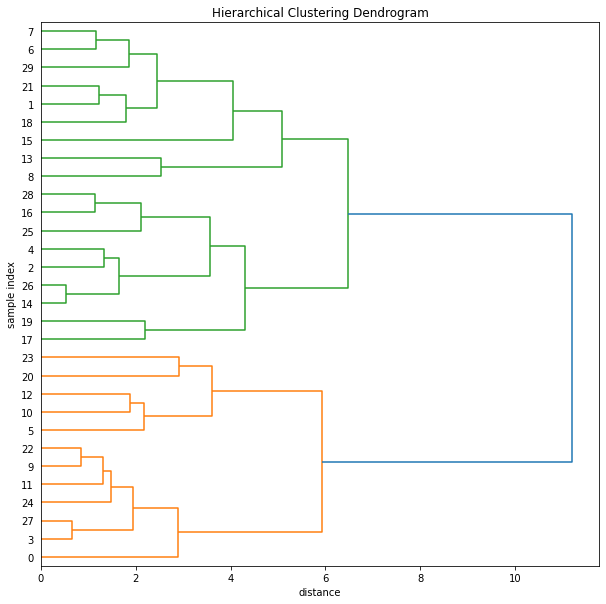

In [7]:
# 덴드로그램 [연결:ward, 거리 계산: Euclidean]
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
# DataFrame 변경: Z_ward, Z_average, Z_Minkowski
dendrogram(Z_ward, leaf_font_size = 10, orientation = "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

# 3-2: 계층형 군집 생성

In [8]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_hierarchical = fcluster(Z = Z_ward, t = 5, criterion = "distance")
# 데이터에 계층형 군집 결과 입력
df_raw["ClusterHierarchical"] = cluster_hierarchical
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


# 3-3: 군집별 데이터 요약

In [9]:
# 집계 함수를 이용한 군집별 데이터 요약
ds_summary_hc = df_raw.groupby("ClusterHierarchical").agg(["min", "mean", "max"])
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + "_" + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


# K-평균 군집분석

In [12]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    # 각 데이터로부터 가장 가까운 군집 중심정까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame( {"NumberofCluster": cluster_range, "Error":clus_error} )
ds_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,93.636837
3,4,80.322205
4,5,69.652837
5,6,59.833764
6,7,50.319528
7,8,44.187762
8,9,37.006660
9,10,32.793639


Text(0, 0.5, 'Sum of squared distance')

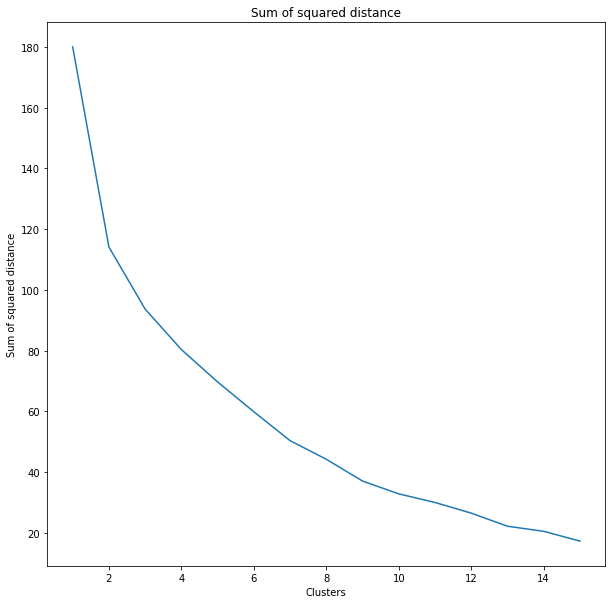

In [13]:
plt.figure(figsize = (10,10))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

# 4-3: K-평균 군집 번호 생성

In [15]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw["ClusterKmeans"] = cluster_kmeans
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,2
1,63,64,51,54,63,73,47,5,2
2,71,70,68,69,76,86,48,3,5
3,61,63,45,47,54,84,35,1,2
4,81,78,56,66,71,83,47,3,5


# 4-4: K-평균 군집별 데이터 요약

In [17]:
ds_summary_km = df_raw.drop("ClusterHierarchical", axis = 1, inplace = False).groupby("ClusterKmeans").agg(["min", "mean", "max"])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + "_" + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,65,72.500,85,60,76.750,85,64,66.500,71,...,75,55,74.75,88,74,77.250,80,55,62.500,72
1,2,43,57.900,67,51,59.500,66,30,47.600,68,...,62,51,60.90,66,73,79.900,92,33,41.000,52
2,3,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.00,58,49,60.000,67,25,35.000,49
3,4,58,73.000,82,67,78.500,90,39,45.250,50,...,72,60,65.00,70,54,66.500,78,35,37.750,41
4,5,65,73.143,81,70,76.429,83,46,62.429,83,...,74,59,73.00,80,77,81.286,86,31,43.143,49


# 5: DBSCAN 군집분석

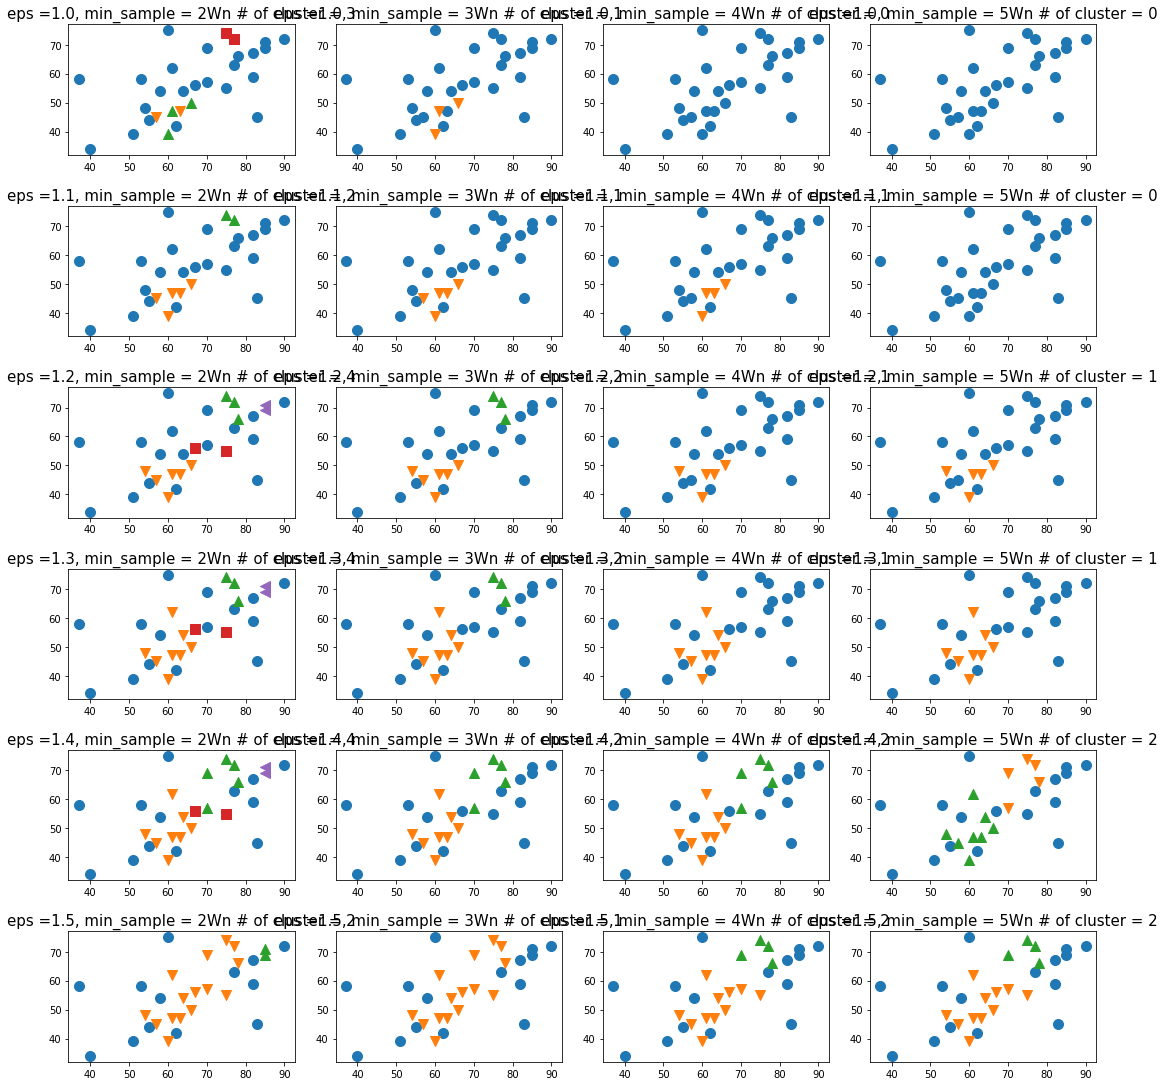

In [22]:
# X축: DISSATIS 변수, Y축: CHANCE
X = df_raw["DISSATIS"]
Y = df_raw["CHANCE"]
# 데이터 point 그림 종류
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]
# eps: 1.0 ~ 1.5, min_samples: 2~5
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15,15)) # plot 개수
fig.tight_layout(w_pad=1, h_pad=3) # plot 간의 간격
# enumerate(): 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples = min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(df_raw_x) # 예측분류
        clusters = clusters + 1 # noise의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)): # 군집별 다른 그림 지정
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title("eps =" + str(eps) + ", min_sample = " + str(min_sample) +
                                 "Wn # of cluster = " + str(max(clusters)), fontsize = 15)

In [23]:
# eps: 특정 데이터로부터 다른 데이터를 포함하는 거리 min_samples: 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps = 1.4, min_samples = 2).fit(df_raw_x)

# 군집 결과
cluster_dbscan = dbscan.labels_
# sklearn의 DBSCAN에서는 noise 데이터의 경우 군집이 -1로 표시되며 0번 군집부터 시작
# 다른 계층형, K-평균은 1번 군집부터 시작하므로 다른 군집 번호와 통일, Noirse 데이터는 0번 군집으로 표기
for (i, val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] + 1
df_raw["ClusterDBScan"] = cluster_dbscan
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,2,0
1,63,64,51,54,63,73,47,5,2,1
2,71,70,68,69,76,86,48,3,5,2
3,61,63,45,47,54,84,35,1,2,1
4,81,78,56,66,71,83,47,3,5,2


In [24]:
# DB 스캔 군집별 요약 통계량
ds_summary_db = df_raw.drop(["ClusterHierarchical", "ClusterKmeans"],
                           axis = 1,
                           inplace = False).groupby("ClusterDBScan").agg(["min", "mean", "max"])
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0 + "_" + level1
ds_summary_db.reset_index(inplace = True)
ds_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63
